#### Обработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
data1 = pd.read_csv('data/experiment1.csv')

In [5]:
(data1['t'] + 0.06) / (41 * 10**(-3)) + 24

0     24.000000
1     25.219512
2     26.195122
3     27.170732
4     28.146341
5     29.121951
6     30.097561
7     34.975610
8     40.097561
9     44.975610
10    49.853659
11    55.219512
12    59.609756
13    64.731707
14    69.365854
15    74.243902
16    79.121951
17    84.000000
18    90.097561
19    93.756098
20    98.634146
Name: t, dtype: float64

In [6]:
x_in = (data1['t'] + 0.06) / (41 * 10**(-3)) + 24
y_in = 13.4 / (data1['cu'] * 1000 * np.pi * (0.07 / 2.)**2)

Y = np.reshape(np.array(y_in), (1, len(y_in)))
X = np.reshape(np.array(x_in), (1, len(x_in)))
def f(x, a, b):
    return a + b * x 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[30.06117874 -0.08821668]
[0.10484105 0.00177104]


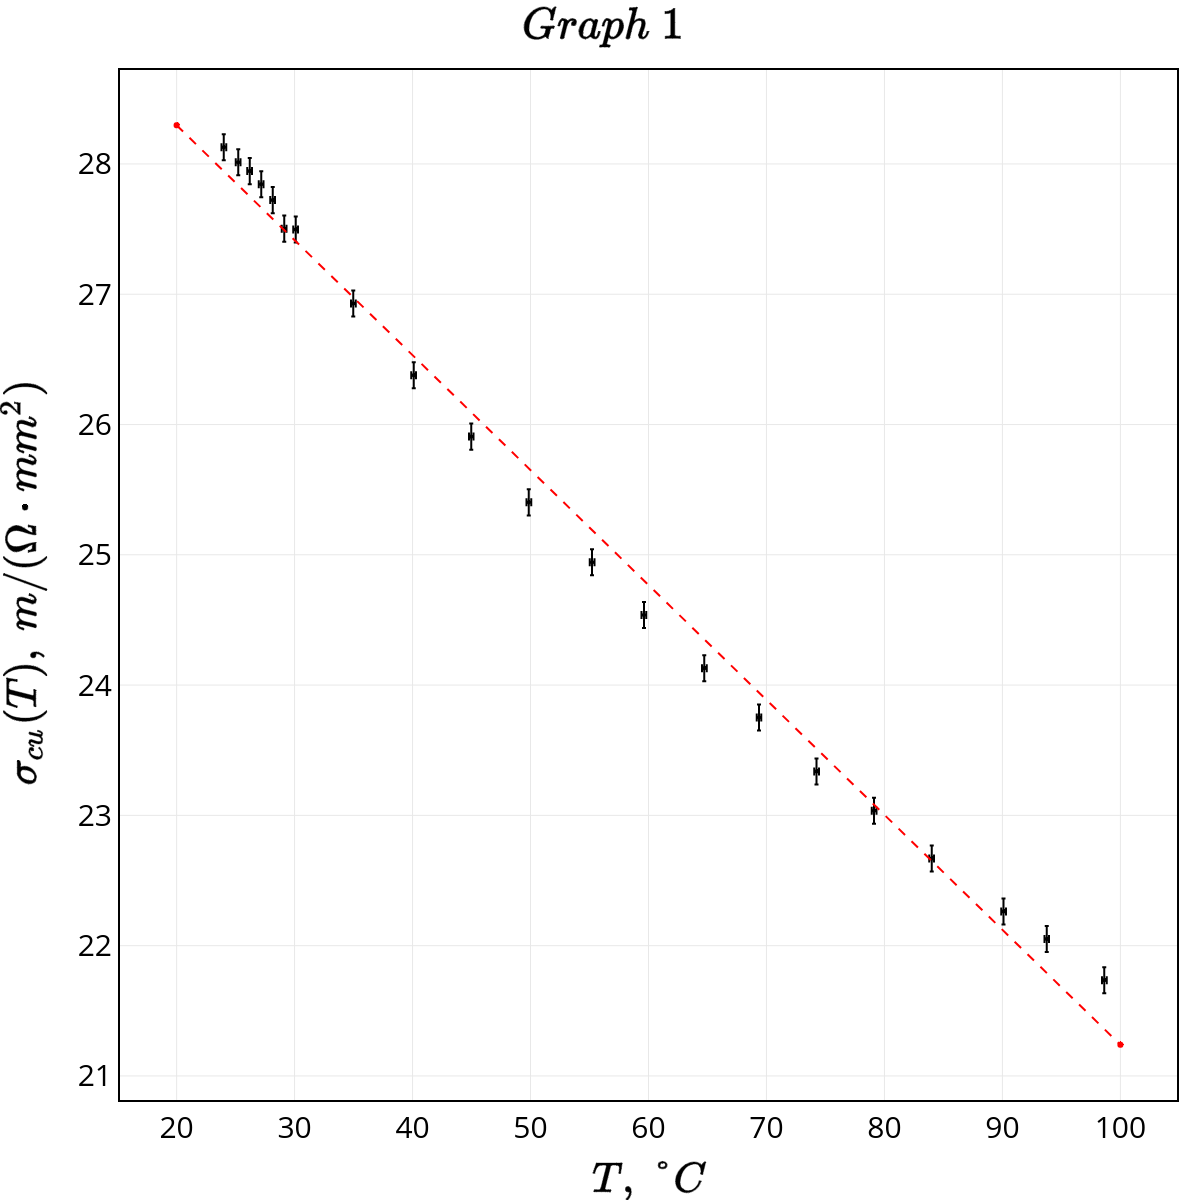

In [7]:
trace1 = go.Scatter(
    x = (data1['t'] + 0.06) / (41 * 10**(-3)) + 24,
    y = 13.4 / (data1['cu'] * 1000 * np.pi * (0.07 / 2.)**2),
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.1,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.2,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [20, 100],
    y = [f(20, 30.06117874, -0.08821668), f(100, 30.06117874, -0.08821668)],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~1$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$T,~°C$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sigma_{cu}(T),~m/(\Omega\cdot mm^2)$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [8]:
-0.08821668 / 25

-0.0035286672

In [9]:
x_in = - 1000. / ((data1['t'] + 0.06) / (41 * 10**(-3)) + 24 + 273)
y_in = np.log((0.01 * 39.4) / 4.1**2  / (data1['pn'] * 1000))

Y = np.reshape(np.array(y_in), (1, len(y_in)))
X = np.reshape(np.array(x_in), (1, len(x_in)))
def f(x, a, b):
    return a + b * x 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[3.82007895 4.1995625 ]
[0.05242233 0.01698547]


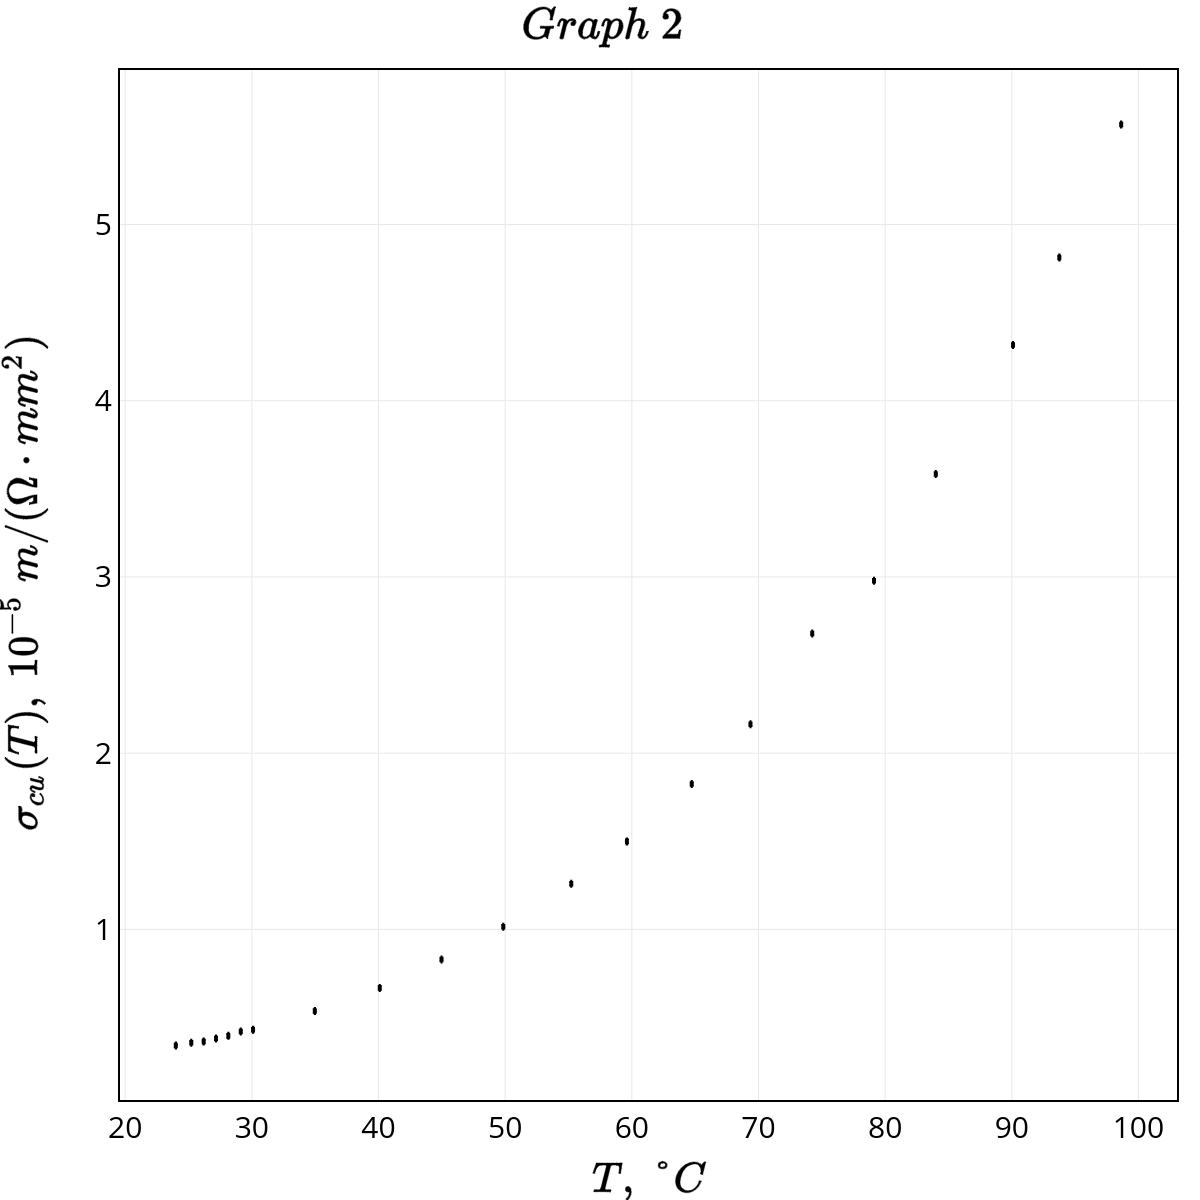

In [10]:
trace1 = go.Scatter(
    x = (data1['t'] + 0.06) / (41 * 10**(-3)) + 24,
    y = (0.01 * 39.4) / 4.1**2  / (data1['pn'] * 1000) * 10000,
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.005,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace0 = [trace1]

layout = go.Layout(
    title = "$Graph~2$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$T,~°C$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\sigma_{cu}(T),~10^{-5}~m/(\Omega\cdot mm^2) $',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

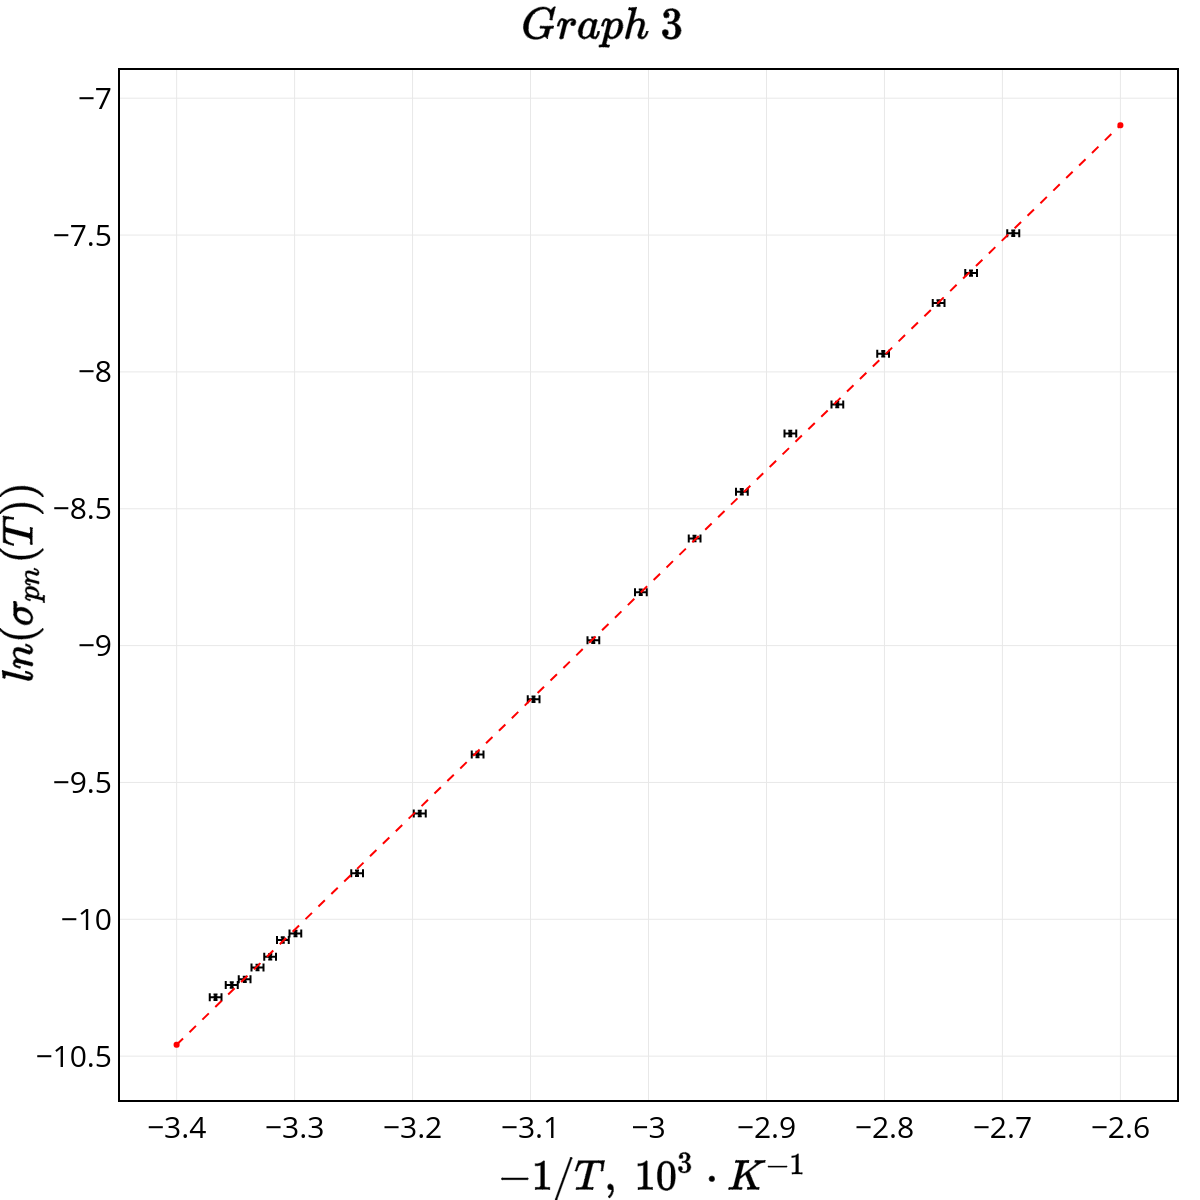

In [13]:
trace1 = go.Scatter(
    x = - 1000. / ((data1['t'] + 0.06) / (41 * 10**(-3)) + 24 + 273),
    y = np.log((0.01 * 39.4) / 4.1**2  / (data1['pn'] * 1000)),
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.005,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-3.4, -2.6],
    y = [f(-3.4, 3.82007895, 4.1995625), f(-2.6, 3.82007895, 4.1995625)],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~3$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$-1/T,~10^3\cdot K^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$ln(\sigma_{pn}(T))$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [12]:
4.19956250e+03 * 2. * 8.617 * 10**(-5)

0.7237526012500001